[Key Differences among Model Classes](https://medium.com/@birendrasharma0226/key-differences-among-model-classes-a060ebea34c6) <br>

[What are differences between AutoModelForSequenceClassification vs AutoModel](https://stackoverflow.com/questions/69907682/what-are-differences-between-automodelforsequenceclassification-vs-automodel)

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/anupampaul005/fake-news-dataset")

Skipping, found downloaded files in "./fake-news-dataset" (use force=True to force download)


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/fake-news-dataset/dataset.csv")

In [ ]:
!pip install -q -U transformers accelerate datasets bertviz umap-learn seaborn

In [ ]:
!pip install -q -U openpyxl

In [ ]:
df.head()

,title,text,unreliable,author
0,WARNING: A Pivotal Moment For The Stock Market...,WARNING: A Pivotal Moment For The Stock Market...,1,Anonymous Coward (UID 72071746)
1,"Trump, top defense officials, discuss North Ko...",WASHINGTON - U.S. President Donald Trump met ...,0,Unknown
2,British civil servants' union calls nationwide...,LONDON - British civil servants will vote nex...,0,Unknown
3,A**hole Of The Day – Michele Bachmann: Muslim...,Michele Bachmann has been pretty quiet since l...,1,Unknown
4,’Deport Fat People’ Posters Appear At CU Bould...,Posters calling on Donald Trump to “Deport Fat...,0,Lucas Nolan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       65140 non-null  object
 1   text        65658 non-null  object
 2   unreliable  65698 non-null  int64 
 3   author      63741 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,unreliable
count,65698.000000
mean,0.515906
std,0.499751
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.isnull().sum()

,0
title,558
text,40
unreliable,0
author,1957


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
title,0
text,0
unreliable,0
author,0


In [ ]:
df.shape

(63182, 4)

In [ ]:
df["unreliable"].value_counts()

,count
unreliable,
0,31777
1,31405


In [ ]:
import matplotlib.pyplot as plt

<Axes: ylabel='unreliable'>

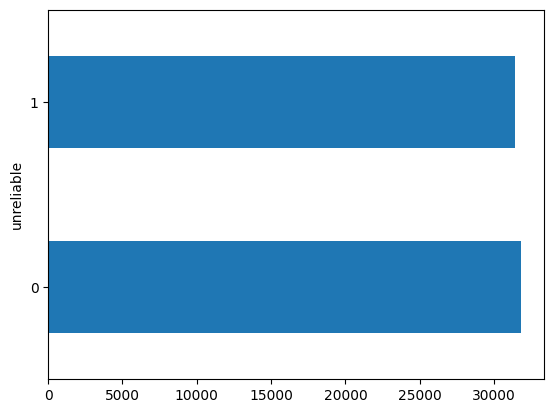

In [ ]:
df["unreliable"].value_counts().plot.barh()

In [ ]:
df["title_tokens"] = df["title"].apply(lambda x: len(x.split()) * 1.5)
df["text_tokens"] = df["text"].apply(lambda x: len(x.split()) * 1.5)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,title,text,unreliable,author,title_tokens,text_tokens
0,WARNING: A Pivotal Moment For The Stock Market...,WARNING: A Pivotal Moment For The Stock Market...,1,Anonymous Coward (UID 72071746),16.5,64.5
1,"Trump, top defense officials, discuss North Ko...",WASHINGTON - U.S. President Donald Trump met ...,0,Unknown,15.0,127.5
2,British civil servants' union calls nationwide...,LONDON - British civil servants will vote nex...,0,Unknown,12.0,456.0
3,A**hole Of The Day – Michele Bachmann: Muslim...,Michele Bachmann has been pretty quiet since l...,1,Unknown,21.0,949.5
4,’Deport Fat People’ Posters Appear At CU Bould...,Posters calling on Donald Trump to “Deport Fat...,0,Lucas Nolan,21.0,184.5


In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df["unreliable"])

In [ ]:
df.shape, train.shape, test.shape

((63182, 6), (44227, 6), (18955, 6))

In [ ]:
test, validation = train_test_split(test, test_size=0.15, random_state=42, stratify=test["unreliable"])

In [ ]:
test.shape, validation.shape

((16111, 6), (2844, 6))

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens'],
        num_rows: 44227
    })
    test: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens'],
        num_rows: 16111
    })
    validation: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens'],
        num_rows: 2844
    })
})

In [ ]:
from transformers import AutoTokenizer

In [ ]:
distilbert_model = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
mobilebert = AutoTokenizer.from_pretrained("google/mobilebert-uncased")
tinybert = AutoTokenizer.from_pretrained("huawei-noah/TinyBERT_General_4L_312D")

In [ ]:
text = "How is the weather today?"

In [ ]:
mobilebert.tokenize(text), tinybert.tokenize(text), distilbert_model.tokenize(text)

(['how', 'is', 'the', 'weather', 'today', '?'],
 ['how', 'is', 'the', 'weather', 'today', '?'],
 ['how', 'is', 'the', 'weather', 'today', '?'])

In [ ]:
distilbert_model, mobilebert, tinybert

(DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
 	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 }
 ),
 MobileBertTokenizerFast(name_or_path='google/mobilebert-uncased', vocab_size=30522, model_max_length=100

In [ ]:
distilbert_model(text), mobilebert(text), tinybert(text)

({'input_ids': [101, 2129, 2003, 1996, 4633, 2651, 1029, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [101, 2129, 2003, 1996, 4633, 2651, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [101, 2129, 2003, 1996, 4633, 2651, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]})

In [ ]:
df.head()

,title,text,unreliable,author,title_tokens,text_tokens
0,WARNING: A Pivotal Moment For The Stock Market...,WARNING: A Pivotal Moment For The Stock Market...,1,Anonymous Coward (UID 72071746),16.5,64.5
1,"Trump, top defense officials, discuss North Ko...",WASHINGTON - U.S. President Donald Trump met ...,0,Unknown,15.0,127.5
2,British civil servants' union calls nationwide...,LONDON - British civil servants will vote nex...,0,Unknown,12.0,456.0
3,A**hole Of The Day – Michele Bachmann: Muslim...,Michele Bachmann has been pretty quiet since l...,1,Unknown,21.0,949.5
4,’Deport Fat People’ Posters Appear At CU Bould...,Posters calling on Donald Trump to “Deport Fat...,0,Lucas Nolan,21.0,184.5


In [ ]:
df.iloc[0][0], df.iloc[0][1]

/tmp/ipython-input-956240467.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[0][0], df.iloc[0][1]


('WARNING: A Pivotal Moment For The Stock Market May Be Here',
 'WARNING: A Pivotal Moment For The Stock Market May Be Here Page 1 10/16/16 2 Mail with questions or comments about this site. "Godlike Productions" & "GLP" are registered trademarks of Zero Point Ltd. Godlike Website Design Copyright © 1999 - 2015 Godlikeproductions.com')

In [ ]:
df.iloc[0]

,0
title,WARNING: A Pivotal Moment For The Stock Market...
text,WARNING: A Pivotal Moment For The Stock Market...
unreliable,1
author,Anonymous Coward (UID 72071746)
title_tokens,16.5
text_tokens,64.5


In [ ]:
def tokenize(batch, tokenizer):
  tokenized_batch = tokenizer(batch["text"], padding=True, truncation=True)
  tokenized_batch["labels"] = batch["unreliable"]
  return tokenized_batch

In [ ]:
train["text"].iloc[0]

'PBS host Judy Woodroof asked Hillary if she believed President Trump is racist? Hillary pauses for effect and then delivers her very scripted answer to Woodruff:  Here s what I believe, I believe that he has given a lot of encouragement and rhetorical support to the Ku Klux Klan, he accepted the support of David Duke. Hillary knowingly pushed the lie that Trump accepted the support of KKK member David Duke. It s the same lie she s been peddling since Trump became her opponent in the presidential race, even though she knows there isn t one shred of evidence or proof to back up her sick claim. Her answer to Woodruff is nothing more than a lame attempt to pin Trump a false allegation on our sitting President while deflecting from the truth about her ACTUAL ties to the KKK. Watch Hillary attempt to paint President Trump as a  racist .When President Trump was dropping out of the Reform Party primary in 2000, he clearly condemned David Duke during an interview with Matt Lauer.When pressed b

In [ ]:
train.iloc[0]["text"]

'PBS host Judy Woodroof asked Hillary if she believed President Trump is racist? Hillary pauses for effect and then delivers her very scripted answer to Woodruff:  Here s what I believe, I believe that he has given a lot of encouragement and rhetorical support to the Ku Klux Klan, he accepted the support of David Duke. Hillary knowingly pushed the lie that Trump accepted the support of KKK member David Duke. It s the same lie she s been peddling since Trump became her opponent in the presidential race, even though she knows there isn t one shred of evidence or proof to back up her sick claim. Her answer to Woodruff is nothing more than a lame attempt to pin Trump a false allegation on our sitting President while deflecting from the truth about her ACTUAL ties to the KKK. Watch Hillary attempt to paint President Trump as a  racist .When President Trump was dropping out of the Reform Party primary in 2000, he clearly condemned David Duke during an interview with Matt Lauer.When pressed b

In [ ]:
tokenize(train.iloc[0], distilbert_model)

{'input_ids': [101, 13683, 3677, 12120, 3536, 3217, 11253, 2356, 18520, 2065, 2016, 3373, 2343, 8398, 2003, 16939, 1029, 18520, 19623, 2005, 3466, 1998, 2059, 18058, 2014, 2200, 22892, 3437, 2000, 3536, 26919, 1024, 2182, 1055, 2054, 1045, 2903, 1010, 1045, 2903, 2008, 2002, 2038, 2445, 1037, 2843, 1997, 15846, 1998, 17871, 2389, 2490, 2000, 1996, 13970, 1047, 25148, 26613, 1010, 2002, 3970, 1996, 2490, 1997, 2585, 3804, 1012, 18520, 4209, 2135, 3724, 1996, 4682, 2008, 8398, 3970, 1996, 2490, 1997, 1047, 19658, 2266, 2585, 3804, 1012, 2009, 1055, 1996, 2168, 4682, 2016, 1055, 2042, 21877, 21814, 2144, 8398, 2150, 2014, 7116, 1999, 1996, 4883, 2679, 1010, 2130, 2295, 2016, 4282, 2045, 3475, 1056, 2028, 14021, 5596, 1997, 3350, 2030, 6947, 2000, 2067, 2039, 2014, 5305, 4366, 1012, 2014, 3437, 2000, 3536, 26919, 2003, 2498, 2062, 2084, 1037, 20342, 3535, 2000, 9231, 8398, 1037, 6270, 2035, 29107, 3508, 2006, 2256, 3564, 2343, 2096, 13366, 2571, 11873, 2013, 1996, 3606, 2055, 2014, 5025, 7

In [ ]:
distilbert_model(train.iloc[0]["text"]) == tokenize(train.iloc[0], distilbert_model)

False

In [ ]:
tokenized_dataset0 = dataset.map(tokenize, batched=True, fn_kwargs={"tokenizer": distilbert_model})

Map:   0%|          | 0/44227 [00:00<?, ? examples/s]

Map:   0%|          | 0/16111 [00:00<?, ? examples/s]

Map:   0%|          | 0/2844 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModel
import torch

In [ ]:
label2id = {"Reliable": 0, "Unreliable": 1}
id2label = {0: "Reliable", 1: "Unreliable"}

In [ ]:
model_distilbert = AutoModel.from_pretrained("distilbert-base-uncased")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [ ]:
from transformers import AutoConfig, AutoModelForSequenceClassification

In [ ]:
config = AutoConfig.from_pretrained("distilbert-base-uncased", label2id=label2id, id2label=id2label)

In [ ]:
model_distilbert0 = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_distilbert0.device

device(type='cuda', index=0)

In [ ]:
model_distilbert

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
model_distilbert0

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
model_distilbert.config

DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.55.2",
  "vocab_size": 30522
}

In [ ]:
model_distilbert0.config

DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Reliable",
    "1": "Unreliable"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Reliable": 0,
    "Unreliable": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.55.2",
  "vocab_size": 30522
}

In [ ]:
!pip install -q -U evaluate

In [ ]:
import evaluate
import numpy as np

In [ ]:
accuracy = evaluate.load("accuracy")

In [ ]:
from transformers import TrainingArguments

In [ ]:
batch_size = 32

training_dir = "training_directory"

In [ ]:
TrainingArguments(
  output_dir=training_dir,
  overwrite_output_dir=True,
  num_train_epochs=2,
  learning_rate=1e-5,
  per_device_train_batch_size=batch_size,
  per_device_eval_batch_size=batch_size,
  weight_decay=0.01,
  disable_tqdm=False
)

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.NO,
eval_use_gather_object=False,


In [ ]:
def compute_metrics(eval_preds):
  predictions, labels = eval_preds
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import Trainer

In [ ]:
tokenized_dataset0

DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 44227
    })
    test: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 16111
    })
    validation: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2844
    })
})

In [ ]:
trainer = Trainer(
    model=model_distilbert0,
    compute_metrics=compute_metrics,
    train_dataset=tokenized_dataset0["train"],
    eval_dataset=tokenized_dataset0["validation"],
    tokenizer=distilbert_model
)

/tmp/ipython-input-3170338959.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: term101112 (term101112-n-a) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.162700
1000,0.061800
1500,0.051600
2000,0.041000
2500,0.046000
3000,0.037800
3500,0.036700
4000,0.027900
4500,0.029600
5000,0.020800


TrainOutput(global_step=16587, training_loss=0.020564126014411217, metrics={'train_runtime': 7535.1246, 'train_samples_per_second': 17.608, 'train_steps_per_second': 2.201, 'total_flos': 1.7575906921076736e+16, 'train_loss': 0.020564126014411217, 'epoch': 3.0})

In [ ]:
preds_output = trainer.predict(tokenized_dataset0["test"])

In [ ]:
preds_output

PredictionOutput(predictions=array([[-6.327902 ,  6.4724164],
       [ 6.7054996, -7.6643357],
       [ 6.759224 , -7.7025247],
       ...,
       [-6.3561954,  6.4896154],
       [-6.3063745,  6.4571934],
       [-6.3106647,  6.453131 ]], dtype=float32), label_ids=array([1, 0, 0, ..., 1, 1, 1]), metrics={'test_loss': 0.009078380651772022, 'test_accuracy': 0.9987586121283595, 'test_runtime': 249.4597, 'test_samples_per_second': 64.584, 'test_steps_per_second': 8.073})

In [ ]:
preds_output.metrics

{'test_loss': 0.009078380651772022,
 'test_accuracy': 0.9987586121283595,
 'test_runtime': 249.4597,
 'test_samples_per_second': 64.584,
 'test_steps_per_second': 8.073}

In [ ]:
preds_output.predictions

array([[-6.327902 ,  6.4724164],
       [ 6.7054996, -7.6643357],
       [ 6.759224 , -7.7025247],
       ...,
       [-6.3561954,  6.4896154],
       [-6.3063745,  6.4571934],
       [-6.3106647,  6.453131 ]], dtype=float32)

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [ ]:
y_preds

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
tokenized_dataset0

DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 44227
    })
    test: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 16111
    })
    validation: Dataset({
        features: ['title', 'text', 'unreliable', 'author', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2844
    })
})

In [ ]:
y_true = tokenized_dataset0["test"][:]["labels"]

In [ ]:
y_true[:4]

[1, 0, 0, 1]

In [ ]:
y_true[-3:]

[1, 1, 1]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8103
           1       1.00      1.00      1.00      8008

    accuracy                           1.00     16111
   macro avg       1.00      1.00      1.00     16111
weighted avg       1.00      1.00      1.00     16111



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_true, y_preds))

[[8090   13]
 [   7 8001]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(y_true, y_preds)

  return {"accuracy": acc, "f1_score": f1}

In [ ]:
preds_output.label_ids

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
compute_metrics(preds_output)

{'accuracy': 0.9987586121283595, 'f1_score': 0.9987586146823367}

In [169]:
trainer.save_model("fake-news-DistilBERT")

In [164]:
!zip -r /content/fake-news-DistilBERT.zip /content/fake-news-DistilBERT

  adding: content/fake-news-DistilBERT/ (stored 0%)
  adding: content/fake-news-DistilBERT/.ipynb_checkpoints/ (stored 0%)
  adding: content/fake-news-DistilBERT/config.json (deflated 47%)
  adding: content/fake-news-DistilBERT/vocab.txt (deflated 53%)
  adding: content/fake-news-DistilBERT/tokenizer_config.json (deflated 75%)
  adding: content/fake-news-DistilBERT/tokenizer.json (deflated 71%)
  adding: content/fake-news-DistilBERT/special_tokens_map.json (deflated 42%)


In [165]:
from google.colab import files

In [166]:
files.download('/content/fake-news-DistilBERT.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [167]:
from transformers import pipeline

In [170]:
pipe = pipeline("text-classification", model="fake-news-DistilBERT")

Device set to use cuda:0


In [172]:
pipe("The media has been talking all day about Trump and the Republican Party")

[{'label': 'Unreliable', 'score': 0.9999922513961792}]

In [174]:
pipe("WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S.")

[{'label': 'Reliable', 'score': 0.9999995231628418}]